In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#load the image
img=cv2.imread(r"C:\Users\RISHIKA REDDY\OneDrive\Desktop\IVP LAB1\image-enhancepic.png",cv2.IMREAD_GRAYSCALE)

In [4]:
#compute the fast fourier transform of the image and shift the zero frequency of the center
f=np.fft.fft2(img)
fshift=np.fft.fftshift(f)


In [5]:
#create an ideal low-pass filter in frequency mask
rows,cols=img.shape
crow,ccol=rows//2,cols//2#center
radius=30#cutoff frequency radius
mask=np.zeros((rows,cols),np.uint8)
cv2.circle(mask,(ccol,crow),radius,1,thickness=-1)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
#apply the low-pass filter in frequency domain
fshift_low=fshift*mask
img_low=np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_low)))

In [7]:
#create the high_pass filter mask(inverse of low_pass)
mask_high=1-mask
fshift_high=fshift*mask_high
img_high=np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_high)))

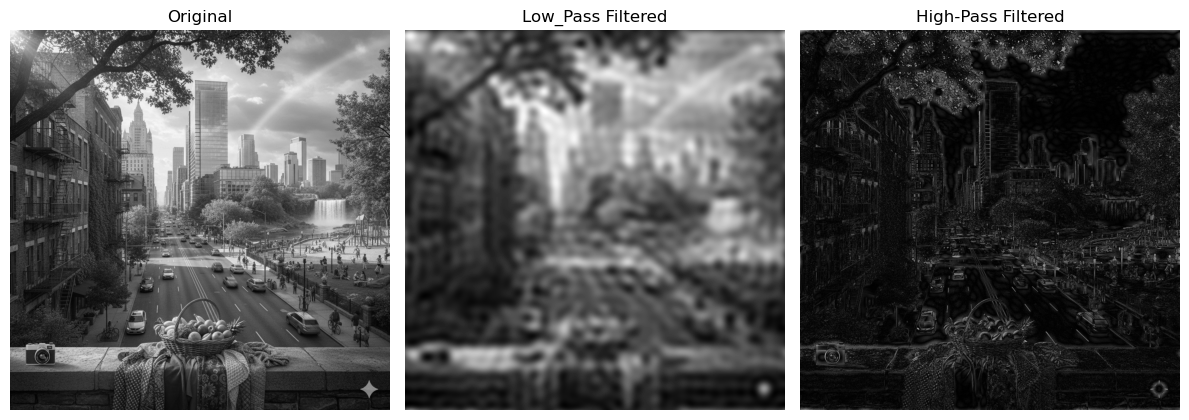

In [8]:
#display original image
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img,cmap="gray")
plt.title('Original')
plt.axis("off")

#low_pass
plt.subplot(1,3,2)
plt.imshow(img_low,cmap="gray")
plt.title("Low_Pass Filtered")
plt.axis("off")

#high pass filter
plt.subplot(1,3,3)
plt.imshow(img_high,cmap="gray")
plt.title("High-Pass Filtered")
plt.axis("off")

plt.tight_layout()
plt.show()
